In [14]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

- torch.multinomial(probability tensor,sampling number, replacement=False(default))

In [15]:
probs = torch.tensor([1, 6, 3, 0], dtype=torch.float)
torch.multinomial(probs,3,replacement=True)

tensor([1, 1, 1])

- Multinomial(#samples, probability tensor)

In [26]:
count = 10000
m = multinomial.Multinomial(count, probs)
x = m.sample()
x,x/count

(tensor([1045., 5989., 2966.,    0.]),
 tensor([0.1045, 0.5989, 0.2966, 0.0000]))

**For the 4 probs, in each sample, the sum of votes/number of total votes accumulates down the row**

In [53]:
counts = multinomial.Multinomial(10, probs).sample((4,)) #tensor(4*4)
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
counts,"random choice accumulation",cum_counts,"number of choices",cum_counts.sum(dim=1, keepdims=True),"probability estimation",estimates

(tensor([[1., 7., 2., 0.],
         [4., 5., 1., 0.],
         [2., 6., 2., 0.],
         [3., 3., 4., 0.]]),
 'random choice accumulation',
 tensor([[ 1.,  7.,  2.,  0.],
         [ 5., 12.,  3.,  0.],
         [ 7., 18.,  5.,  0.],
         [10., 21.,  9.,  0.]]),
 'number of choices',
 tensor([[10.],
         [20.],
         [30.],
         [40.]]),
 'probability estimation',
 tensor([[0.1000, 0.7000, 0.2000, 0.0000],
         [0.2500, 0.6000, 0.1500, 0.0000],
         [0.2333, 0.6000, 0.1667, 0.0000],
         [0.2500, 0.5250, 0.2250, 0.0000]]))

**# of samples rises, estimation converges to prob_distribution faster**  
**# of choices in each sample rises, estimation converges to prob_distribution faster**

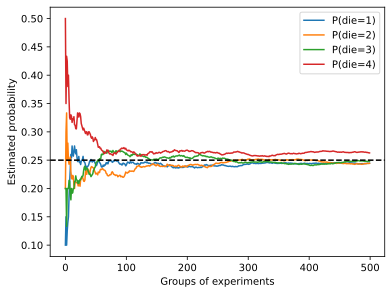

In [125]:
probs = torch.tensor([1,1,1,1], dtype=torch.float)
counts = multinomial.Multinomial(20, probs).sample((500,)) #tensor(500*4)
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(4):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.25, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()